In [5]:
import os
from util import *
# from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

from nltk.parse.corenlp import CoreNLPDependencyParser, CoreNLPParser
dep_parser = CoreNLPDependencyParser(url='http://localhost:9000')
# nlp_parser = CoreNLPParser(url='http://localhost:9000')


In [6]:
sent = 'Number of top scoring boxes to keep'


In [7]:
parse, = dep_parser.raw_parse(sent)
parsing_tree = parse.tree()
# horizontal_format = tree2horizontal(parsing_tree)
#horizontal_format = [x.lower() for x in horizontal_format]
# here horizontal_format is a list of str.


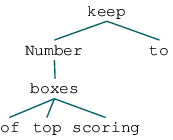

In [10]:
parsing_tree

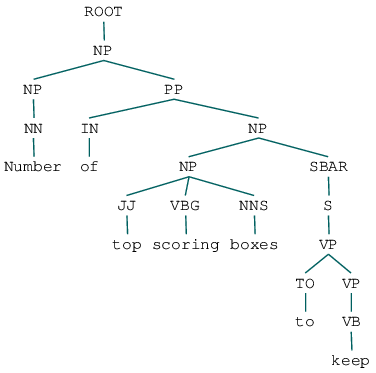

In [12]:
nlp_parser = CoreNLPParser(url='http://localhost:9000')
parse, = nlp_parser.raw_parse(sent)
parse

In [14]:
parse.tree

AttributeError: 'Tree' object has no attribute 'tree'

In [2]:
import nltk
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [102]:
print(tree.to_conll(4))  

a	DT	2	det
D_STRUCTURE	NN	0	ROOT
of	IN	5	case
type	NN	5	compound
D_TYPE	NN	2	nmod



In [115]:
wordset = load_data4mining([sent])
encoding_df = get_encoded_df(wordset)
# word_map: word->idx
# word_map_inverse: idx->word
word_map, word_map_inverse = get_word_map(encoding_df)
encoded_tree = encode_horizontal_tree(0, horizontal_format, word_map)
# save_list(dataset, os.path.join(save_path, 'mining_input'))

In [117]:
' '.join(horizontal_format)

'checked if -1 indices constant_bool -1 -1 are -1 make to -1 sure sorted they -1 are -1 order in -1 lexicographic -1 -1 -1 -1 -1 and -1 are that -1 there -1 repeats no -1 -1 -1 -1'

In [61]:
word_map

{'a': 0, 'an': 1, 'd_structure': 2, 'd_type': 3, 'of': 4, 'or': 5}

In [62]:
word_map_inverse

{0: 'a', 1: 'an', 2: 'd_structure', 3: 'd_type', 4: 'of', 5: 'or'}

In [63]:
encoded_tree

'0 0 14 3 1 -1 5 -1 2 0 -1 -1 3 4 -1 -1 -1'

In [64]:
save_list([encoded_tree, ''], './TreeMiner/tmp_data')

In [65]:
import os

In [66]:
os.system('./TreeMiner/treeminer -i ./TreeMiner/tmp_data -S 1 -o -l > ./TreeMiner/tmp_out')

0

In [84]:
def get_all_subtree(sent, horizontal_format):
    decoded_subtree_list = []
    mining_input_path = './TreeMiner/tmp_data'
    mining_output_path  = './TreeMiner/tmp_out'
    wordset = load_data4mining([sent])
    encoding_df = get_encoded_df(wordset)
    # word_map: word->idx
    # word_map_inverse: idx->word
    word_map, word_map_inverse = get_word_map(encoding_df)
    encoded_tree = encode_horizontal_tree(0, horizontal_format, word_map)
    save_list([encoded_tree, ''], mining_input_path)
    exe_var = os.system('./TreeMiner/treeminer -i ./TreeMiner/tmp_data -S 1 -o -l > %s' % mining_output_path)
    assert exe_var == 0


    mine_result = read_file(mining_output_path)[3:]
    mine_result = mine_result[:-1]
    for l in mine_result:
        if l.startswith('ITER') or l.startswith('Tree:'):
            continue
        else:   # frequent subtree with its frequency
            subtree, freq = parse_subtree(l)
            assert freq==1
            decoded_subtree_list.append(decode_subtree(subtree, word_map_inverse))
    return decoded_subtree_list

In [85]:
get_all_subtree(sent, horizontal_format)

['value a', 'value d_type', 'value a -1 d_type']

In [87]:
import subprocess

In [102]:
p = subprocess.Popen(['bash', 'run_treeminer.sh'])
try:
    p.wait(0.5)
except subprocess.TimeoutExpired:
    p.kill()

In [103]:
mine_result = read_file('./TreeMiner/tmp_out')[3:]

In [104]:
mine_result

[]

In [105]:
l = '9 5 15 10 8 -1 -1 0 14 -1 3 2 -1 13 -1 -1 1 -1 7 4 11 -1 13 -1 12 -1 6 -1 -1 15 10 8 -1 -1 0 14 -1 3 2 -1 13 -1 1 -1 7 2 -1 13 -1 4 11 -1 13 -1 12 -1 6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1'

In [108]:
len(l.split())

68

In [109]:
ll = l.split()
for i in range(len(ll)):
    print("{}: {}".format(i, ll[i]))

0: 9
1: 5
2: 15
3: 10
4: 8
5: -1
6: -1
7: 0
8: 14
9: -1
10: 3
11: 2
12: -1
13: 13
14: -1
15: -1
16: 1
17: -1
18: 7
19: 4
20: 11
21: -1
22: 13
23: -1
24: 12
25: -1
26: 6
27: -1
28: -1
29: 15
30: 10
31: 8
32: -1
33: -1
34: 0
35: 14
36: -1
37: 3
38: 2
39: -1
40: 13
41: -1
42: 1
43: -1
44: 7
45: 2
46: -1
47: 13
48: -1
49: 4
50: 11
51: -1
52: 13
53: -1
54: 12
55: -1
56: 6
57: -1
58: -1
59: -1
60: -1
61: -1
62: -1
63: -1
64: -1
65: -1
66: -1
67: -1


In [19]:
import re
def is_shape_range_valid(s):
    def count_bracket(ss):
        return ss.count('(') + ss.count(')') + ss.count('[') + ss.count(']')
    
    
    if count_bracket(s) >2:
        return False
    
    if s[0] not in ['(', ')', '[', ']'] or s[-1] not in ['(', ')', '[', ']']:
        if count_bracket(s) >0:
            return False
        
    if re.search(r'[^a-zA-Z0-9_\(\)\[\],\s]', s):
        return False
    
    return True

In [3]:
'aaa'.count('abc')

0

In [21]:
test = [
    '[-rank(values), rank(values))',
    '[batch, in_channels, height, width]',
    'iw, ih, c_d',
    '[shape] + ddd'
]

for s in test:
    print(is_shape_range_valid(s))

False
True
True
False
